In [2]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
from PIL import Image
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import numpy as np 
from matplotlib.pyplot import imshow
%matplotlib inline

/root/miniconda3/envs/myenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [204]:
maskpath = "../datasets/JSRT/Masks/"
imgpath = "../datasets/JSRT/Images/"
combpath = "../datasets/JSRTcomb/comb/"

for imgname in tqdm(os.listdir(maskpath)):
    # print(imgname)
    msk = Image.open(maskpath + imgname)
    mask = np.expand_dims(np.array(msk)*255, axis = 2)
    image = Image.open(imgpath + imgname)
    img = np.expand_dims(np.array(image), axis = 2)
    tmp = np.zeros_like(img)
    # print(mask.dtype, img.dtype, tmp.shape, tmp.dtype, tmp)
    comb = np.concatenate((img, mask, tmp), axis = 2)
    
    # print(comb.dtype, comb.shape)
    comb = Image.fromarray(comb)
    comb.save(combpath + imgname)
    # break

100%|██████████| 247/247 [00:57<00:00,  4.30it/s]


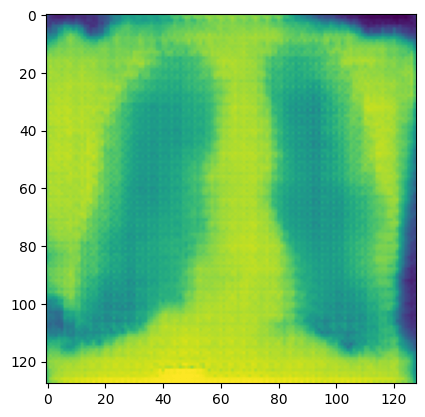

In [22]:
img = mpimg.imread("/root/training_result_images/img_generatori_iter_300.png")
imgplot = plt.imshow(img[:,:, 0][2:130, 2:130]*255)
plt.show()

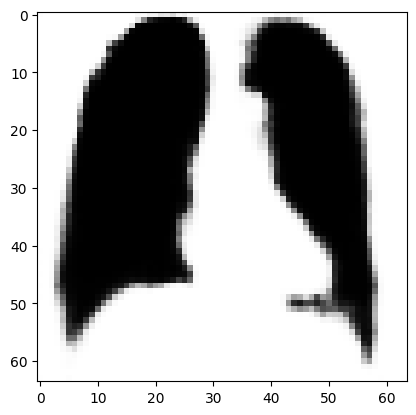

In [14]:
im = Image.fromarray(img[:,:,1][2:66, 2:66]*255)
imshow(im)

In [205]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset

image_size = 256
bs = 32
ngpu = 1
dataroot = "../datasets/JSRTcomb"


dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=bs,shuffle=True)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

In [2]:
dataroot = "/root/data/datasets/JSRT"

In [ ]:
import torch.utils.data as data_utils
import torchvision.datasets as dset
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms
from skimage import io
# from PIL import Image


 class ImageMaskDataset(Dataset):

    def __init__(self, root, transform=None, maskExt="gif"):

        self.root_dir = root
        self.transform = transform
        self.imgs = os.listdir(os.path.join(root, "Images"))
        self.maskExt = maskExt

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        mask_path = os.path.join(self.root_dir, "Masks", self.imgs[idx][:-3] + self.maskExt)
        mask = io.imread(mask_path)
        if len(mask.shape) < 3:
            mask = np.expand_dims(mask, axis = 2)

        img_path = os.path.join(self.root_dir, "Images", self.imgs[idx])
        image = io.imread(img_path)
        if len(mask.shape) < 3:
            image = np.expand_dims(image, axis = 2)
        print(image.shape, mask.shape)

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
       
        return torch.concatenate((image, mask), axis=0)
    


image_size = 256
train_dataset = ImageMaskDataset(root=dataroot,
                        transform=transforms.Compose([
                            transforms.ToPILImage(),
                            transforms.Resize(image_size),
                            transforms.ToTensor(),
                            transforms.Normalize((0.5), (0.5)),
                        ]), maskExt='png')
    



train_dataloader = data_utils.DataLoader(train_dataset, batch_size=4, shuffle=True)



for i in train_dataloader:
    print(i.shape)
    break


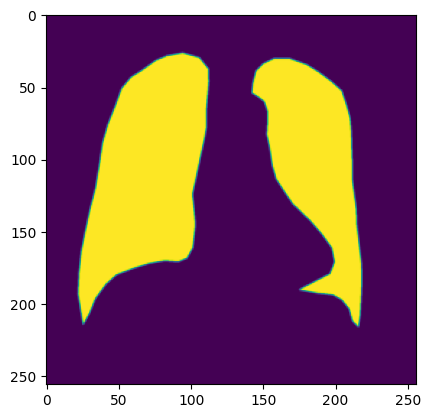

In [60]:
im = i.numpy()
imshow(im[0][1])